# Simple Linear Regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read the dataset
df = pd.read_csv('../data/height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


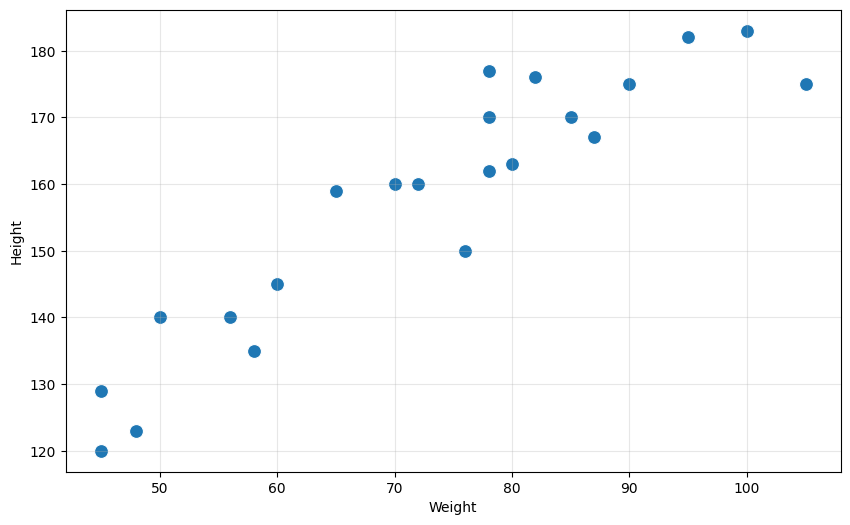

In [4]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Weight', y='Height', s=100)
plt.xlabel("Weight")
plt.ylabel("Height")
plt.grid(True, alpha=.3)
plt.show()

In [5]:
## Divide the dataset into independent and dependent features
x = df[['Weight']] # independent features
y = df['Height'] # dependent features

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [8]:
x_train.shape, x_test.shape

((18, 1), (5, 1))

In [9]:
# Standardize the dataset train independent data
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()
x_train_scaler = scaler.fit_transform(x_train)
x_test_scaler = scaler.transform(x_test)

In [11]:
x_train_scaler.min(), x_train_scaler.max()

(np.float64(-1.6552287996613526), np.float64(1.73689094158013))

In [12]:
x_test_scaler.min(), x_test_scaler.max()

(np.float64(-1.6552287996613526), np.float64(1.171537651373216))

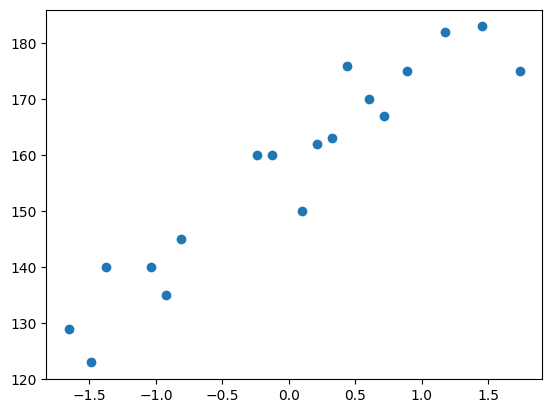

In [13]:
plt.scatter(x_train_scaler, y_train)

In [14]:
# Train the simple linear regression model
from sklearn.linear_model import LinearRegression

In [15]:
regressor = LinearRegression()

In [16]:
regressor.fit(x_train_scaler, y_train)

LinearRegression()

In [17]:
regressor.coef_

array([17.03440872])

In [18]:
regressor.intercept_

np.float64(157.5)

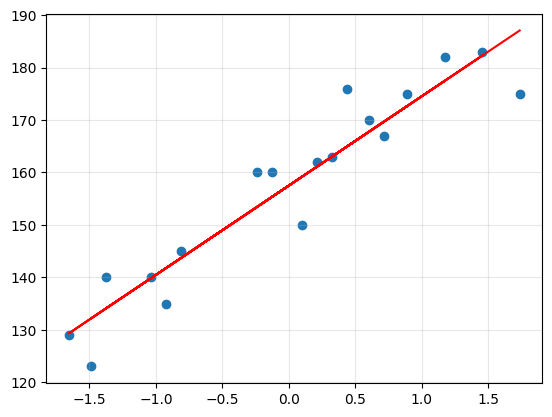

In [19]:
plt.scatter(x_train_scaler, y_train)
plt.plot(x_train_scaler, regressor.predict(x_train_scaler), color='r')
plt.grid(True, alpha=.3)

In [20]:
y_pred_test = regressor.predict(x_test_scaler)

In [21]:
y_pred_test, y_test

(array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

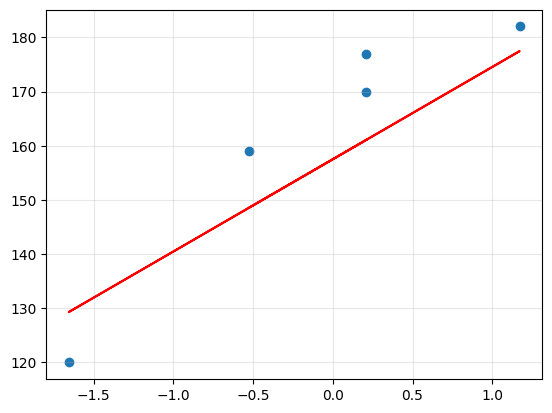

In [22]:
plt.scatter(x_test_scaler, y_test)
plt.plot(x_test_scaler, regressor.predict(x_test_scaler), color='r')
plt.grid(True, alpha=.3)

## Performance Metrics
### MSE, MAE, RMSE
### R square and adjusted

In [23]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error

In [24]:
rmse = root_mean_squared_error(y_test, y_pred_test)
mse = rmse ** 2
mae = mean_absolute_error(y_test, y_pred_test)

print(f"RMSE: {rmse}")
print(f"MSE: {mse}")
print(f"MAE: {mae}")

RMSE: 10.477400726827081
MSE: 109.77592599051665
MAE: 9.822657814519232


In [26]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred_test)
score

0.776986986042344

In [28]:
# Adjusted R²
score_adjusted = 1 - (1-score) * (len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
score_adjusted

0.7026493147231252

In [29]:
regressor

LinearRegression()

In [30]:
# New data point weight is 80
scaled_weight = scaler.transform([[80]])
scaled_weight

/home/francisco/Documents/machine_learning_course/venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [34]:
print(f"Prediction of {scaled_weight} is: {regressor.predict(scaled_weight)[0]:.2f}")

Prediction of [[0.32350772]] is: 163.01


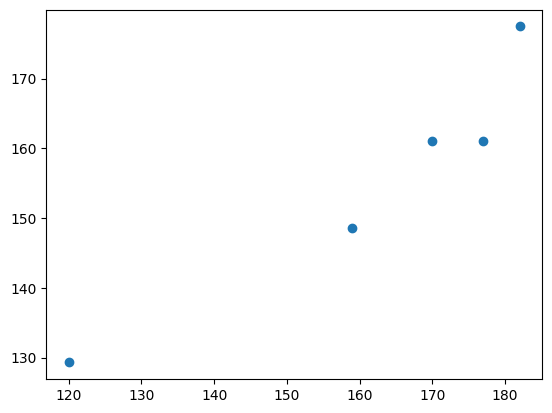

In [35]:
# Assumptions
# plot a scatter plot for the prediction
plt.scatter(y_test, y_pred_test)

In [36]:
# Residuals
residuals = y_test - y_pred_test
residuals

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

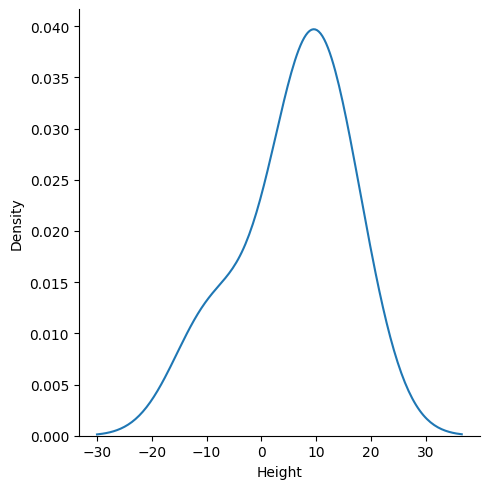

In [37]:
# Plot this residuals
import seaborn as sns
sns.displot(residuals, kind='kde')

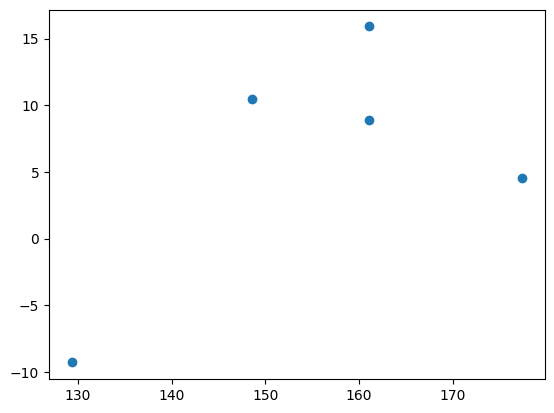

In [38]:
# Scatter plot with respect to prediction and residuals
# uniform distribution
plt.scatter(y_pred_test, residuals)